In [32]:
import patchify
import numpy as np
import cv2
from matplotlib import pyplot as plt
image_path = '/school/CSCI_2470/COD_Project/data/Train/Image/COD10K-CAM-2-Terrestrial-22-Bug-1276.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height_diff = image.shape[1] - 683  # 1024 - 683 = 341
crop_start = height_diff // 2     # 170
crop_end = image.shape[1] - height_diff // 2  # 1024 - 170 = 854

cropped_img = image[:, crop_start:crop_end,:]
resized_img = cv2.resize(cropped_img, (512, 512))
# disable axis
plt.axis('off')
plt.imshow(cropped_img)

[ WARN:0@1532.226] global loadsave.cpp:241 findDecoder imread_('/school/CSCI_2470/COD_Project/data/Train/Image/COD10K-CAM-2-Terrestrial-22-Bug-1276.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


(512, 512, 3)
(4, 4, 1, 128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


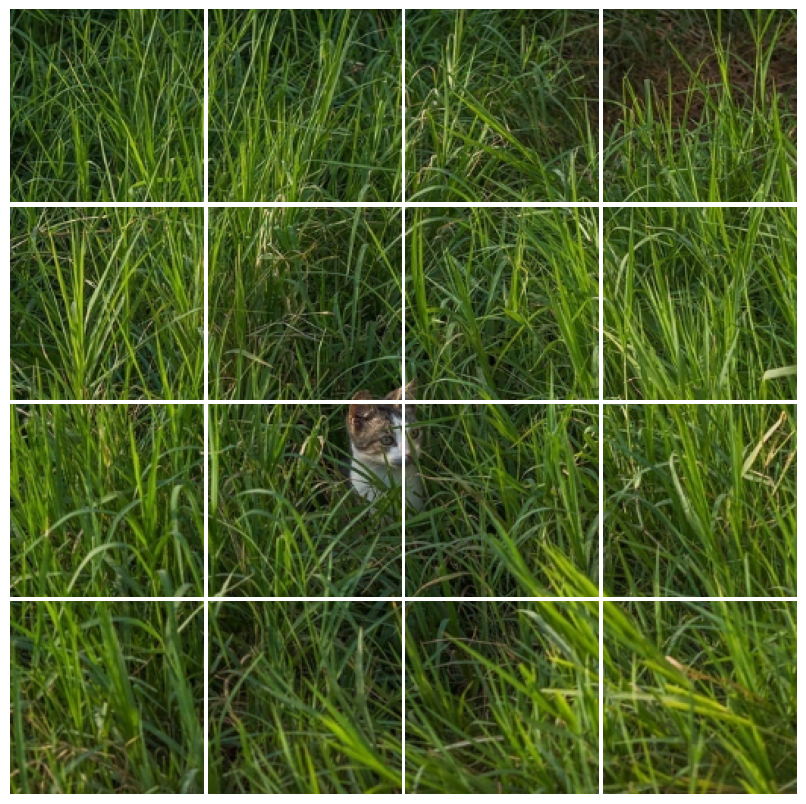

In [28]:
# patchify into 128x128 patches
print(resized_img.shape)  # (512, 512, 3)
patch_size = 128
patches = patchify.patchify(resized_img, (patch_size, patch_size,3), step=patch_size)
print(patches.shape)  # (4, 4, 128, 128, 3) 
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        # eliminate extra dimension 0
        current_patch = np.squeeze(patches[i, j])
        print(current_patch.shape)
        ax[i, j].imshow(current_patch)
        ax[i, j].axis('off')
fig.tight_layout(pad=0.5, w_pad=0.4, h_pad=0.2)
plt.show()

In [30]:
# save patches
for i in range(4):
    for j in range(4):
        current_patch = np.squeeze(patches[i, j])
        cv2.imwrite(f'/school/CSCI_2470/COD_Project/Src/utils/images/patch_{i}_{j}.jpg', current_patch)